In [15]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#step 3: Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("sales_data.csv", encoding="ISO-8859-1")
df.head()
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [19]:
#Step 4: Data Exploration
#Next step I will print some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [14]:
#Next step I will use the describe function to get the statistical information on the datasets

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [21]:
#I will now check the null values

df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [23]:
# Drop ADDRESSLINE2 since ADDRESSLINE1 has no duplicates
cleaned_data = df.drop(columns=["ADDRESSLINE2"])

# Fill missing values in STATE and TERRITORY
cleaned_data = cleaned_data.fillna({"STATE": "UNKNOWN STATE", "TERRITORY": "NOT AVAILABLE"})

# Convert POSTALCODE to numeric, setting non-numeric values to NaN
cleaned_data["POSTALCODE"] = pd.to_numeric(cleaned_data["POSTALCODE"], errors="coerce")

# the next step is that I will Fill missing POSTALCODE values with the median
cleaned_data["POSTALCODE"].fillna(cleaned_data["POSTALCODE"].median(), inplace=True)

# I will now Display first 5 rows
print(cleaned_data)

#I will now confirm is my new Data has any null values

cleaned_data.isnull().sum()


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16036\3546603530.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data["POSTALCODE"].fillna(cleaned_data["POSTALCODE"].median(), inplace=True)


ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

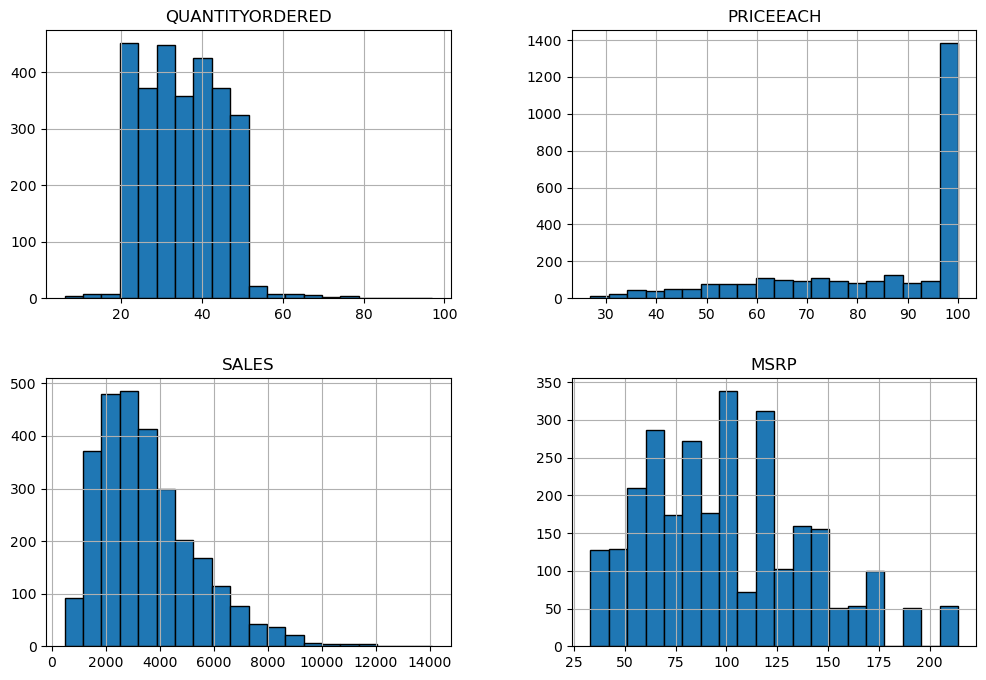

In [25]:
#step 5: VISUALIZATIONS

import matplotlib.pyplot as plt
import seaborn as sns

#I will now Select only numeric columns
numeric_columns = ["QUANTITYORDERED", "PRICEEACH", "SALES", "MSRP"]

# Next step will be to Create histograms
cleaned_data[numeric_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')

# Show the plots

plt.show()



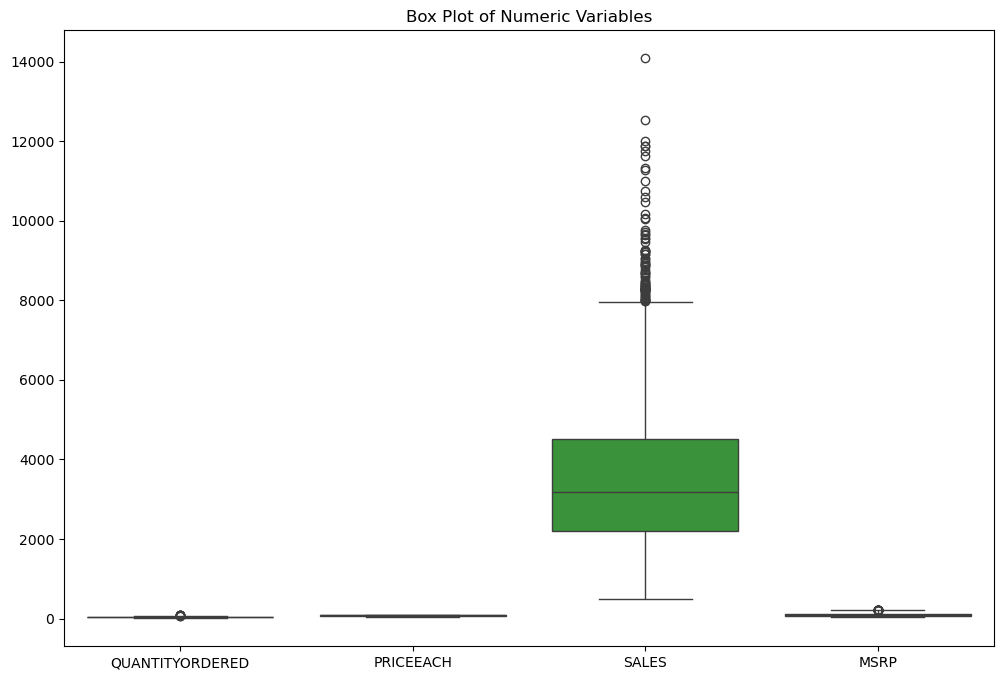

In [27]:
#Now I will construct box plots

# Create a boxplot for all numeric columns

x=cleaned_data[["QUANTITYORDERED", "PRICEEACH", "SALES", "MSRP"]]
plt.figure(figsize=(12, 8))
sns.boxplot(data=x)

#Rotate x labels for better readability
plt.title("Box Plot of Numeric Variables")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

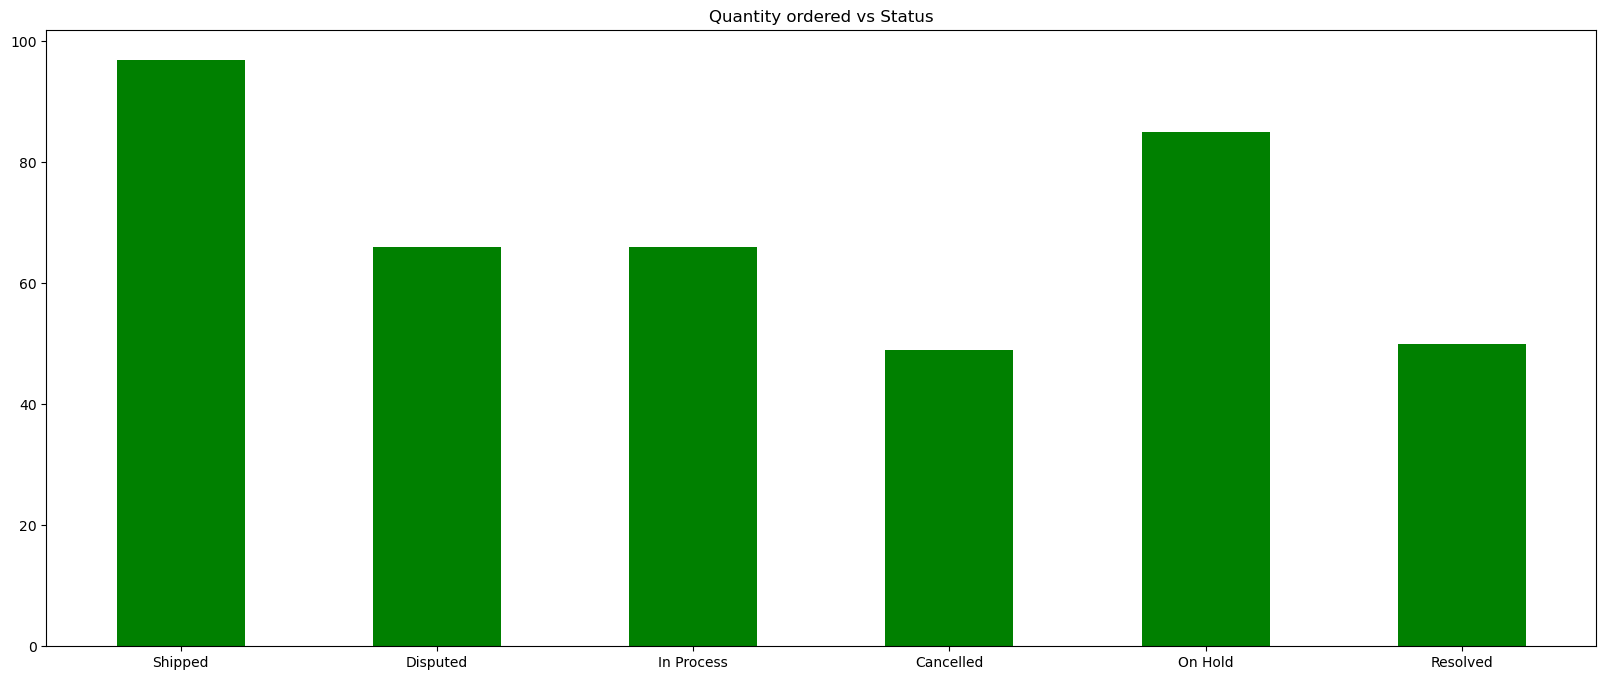

In [39]:
#Bar Chart to visualize the categorical variables

cleaned_data.head()

x=cleaned_data["STATUS"]
y=cleaned_data["QUANTITYORDERED"]
plt.figure(figsize=(20,8))
plt.bar(x,y, color="green", width = 0.5)
plt.title("Quantity ordered vs Status")


plt.show


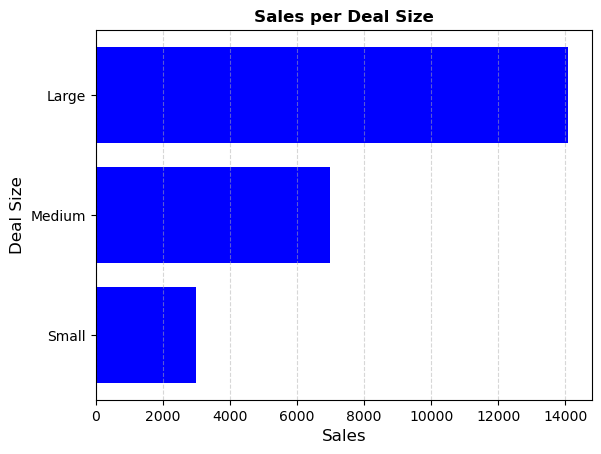

In [47]:

import matplotlib.pyplot as plt

# I will first Extract Deal Size and Sales
x = cleaned_data["DEALSIZE"]  
y = cleaned_data["SALES"]    

plt.barh(x, y, color="blue", height=0.8)  


plt.xlabel("Sales", fontsize=12)
plt.ylabel("Deal Size", fontsize=12)
plt.title("Sales per Deal Size", fontsize=12, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the plot
plt.show()


<Axes: xlabel='SALES', ylabel='QUANTITYORDERED'>

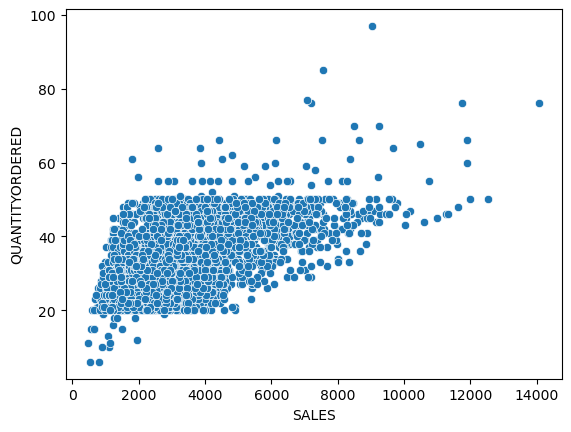

In [154]:
#Scatter plots to analyze relationships between variables


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=cleaned_data,x="SALES",y="QUANTITYORDERED")#This is a scatter plot to represent the relationship between sales and quantity ordered

In [189]:
#Step 6: Data Analysis
#Select only numerical columns
numerical_columns = cleaned_data[["QUANTITYORDERED", "PRICEEACH","SALES","MSRP"]]

# Calculate mean, median, and standard deviation
mean_values = numerical_columns.mean()
median_values = numerical_columns.median()
std_values = numerical_columns.std()

# Print the results
print("Mean values:\n",mean_values)
print("\nMedian values:\n",median_values)
print("\nStandard Deviation values:\n",std_values)


Mean values:
 QUANTITYORDERED      35.092809
PRICEEACH            83.658544
SALES              3553.889072
MSRP                100.715551
dtype: float64

Median values:
 QUANTITYORDERED      35.0
PRICEEACH            95.7
SALES              3184.8
MSRP                 99.0
dtype: float64

Standard Deviation values:
 QUANTITYORDERED       9.741443
PRICEEACH            20.174277
SALES              1841.865106
MSRP                 40.187912
dtype: float64


In [49]:
#Calculate correlation between variables

Corr_columns = cleaned_data[["QUANTITYORDERED", "PRICEEACH","SALES","MSRP"]]

correlation_matrix=Corr_columns.corr()
print(correlation_matrix)


                 QUANTITYORDERED  PRICEEACH     SALES      MSRP
QUANTITYORDERED         1.000000   0.005564  0.551426  0.017881
PRICEEACH               0.005564   1.000000  0.657841  0.670625
SALES                   0.551426   0.657841  1.000000  0.635239
MSRP                    0.017881   0.670625  0.635239  1.000000


<Axes: >

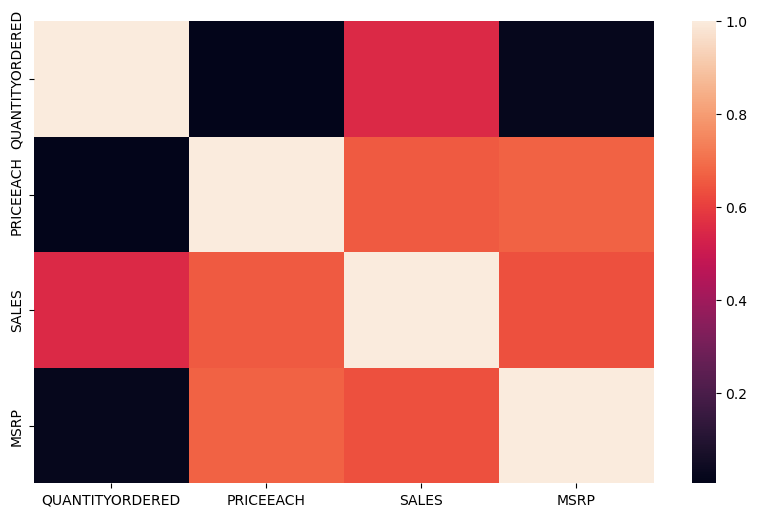

In [51]:
# I will now plot a heatmap of the correlation

Corr_columns = cleaned_data[["QUANTITYORDERED", "PRICEEACH","SALES","MSRP"]]

correlation_matrix=Corr_columns.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix)

# Step 7: Interpretation